# Project: Investigate a TMDB 5000 Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset was taken from The Movie Database(TMDb), "a community built movie and TV database." (www.themoviedb.org/about) Each row corresponds to a movie and includes a range of data about file. Relevant data to be used in the following analysis include the following variables : 

- id                   
- imdb_id              
- popularity           
- budget               
- revenue              
- original_title       
- cast                 
- homepage             
- director             
- tagline              
- keywords             
- overview             
- runtime              
- genres               
- production_companies 
- release_date         
- vote_count           
- vote_average         
- release_year         
- budget_adj(budget in terms of 2010 dollars)           
- revenue_adj (revenue in terms of 2010 dollars)   


 
In this report, I explore the following questions : 

1. Which movie was the most popular in each decade?
2. Which movie earned the most revenue compared to budget?
3. Which genre of movie got the highest or lowest vote average? 
4. Is a certain month of release date associated with higer revunue or higer vote average?

In [37]:
import pandas as pd 
import numpy as np 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [38]:
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

#### 1. Drop Rows with Missing Values

In [40]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [41]:
df.dropna(axis=0, inplace=True)

In [42]:
df.isnull().sum().any()

False

There is no null value

#### 2. Dedupe Data

In [43]:
df.duplicated().sum() 

0

So there is no duplicated data


#### 3.  Change data type of ***'release_date'*** column from Object to Datetime

In [44]:
# Check if there is any data with other format than '/'
df['release_date'].str.contains('/').all()

True

In [45]:
release_date = df['release_date'].str.split(pat='/', expand=True)
release_date.head()

,0,1,2
0,6,9,15
1,5,13,15
2,3,18,15
3,12,15,15
4,4,1,15


Check whether the first two digits stand for Month or Day

In [46]:
(pd.to_numeric(release_date[0])<=12).all()

True

In [47]:
(pd.to_numeric(release_date[1])<=12).all()

False

So, I can guess the date format of the column ***release_date*** is **'MM/DD/YY'**.    

In [48]:
release_date.columns = ['Month', 'Day', 'Year']
release_date.head()

,Month,Day,Year
0,6,9,15
1,5,13,15
2,3,18,15
3,12,15,15
4,4,1,15


But, I am not sure if '15' in ***Year*** column means '1915' or '2015'.    
So I replace the ***Year*** column with ***release_year*** column of df. 

In [49]:
release_date['Year'] = df.release_year.astype(str)
release_date.head()

,Month,Day,Year
0,6,9,2015
1,5,13,2015
2,3,18,2015
3,12,15,2015
4,4,1,2015


As I converted the format of ***Year*** column from 'yy' to 'yyyy', I can finally change the ***release_date*** column to 'mm/dd/yyyy' format by concatenating ***Month***, ***Day***, ***Year*** columns of release_date. 

In [50]:
df.release_date = release_date['Month']+'/'+release_date['Day']+'/'+release_date['Year']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09


Now I will convert the data type of ***release_date*** column from **object** to **datetime**. 

I will use __.to_datetime()__ method in pandas. 

In [51]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y', errors='raise')

To check if there is wrong data in ***release_date*** column, I compare the year of ***release_date*** column and the ***release_year*** column.

In [52]:
df[df.release_date.dt.year != df.release_year]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


Finally, I succeed in converting data type of ***release_date*** column from object to datetime. 

#### 4. Convert Data Types of 'budget_adj', 'revenue_adj' Columns from Float to Int 

In order to convert float to int, I used **.astype()** method in pandas.

In [53]:
df.budget_adj = df.budget_adj.astype('int64')

In [54]:
df.budget_adj.head()

0    137999939
1    137999939
2    101199955
3    183999919
4    174799923
Name: budget_adj, dtype: int64

In the same way, I convert the data type of 'revenue_adj' column from float to int.

In [55]:
df.revenue_adj = df.revenue_adj.astype('int64')

In [56]:
df.revenue_adj.head()

0    1392445892
1     348161292
2     271619025
3    1902723129
4    1385748801
Name: revenue_adj, dtype: int64

In [57]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : Which movies are the top 10 most popular movies? 

In order to find out which movies are the most popular movies, I decided to see "popularity" column.   
To find out top 10 values, I used pandas **.nlargest** method. 

In [86]:
df.nlargest(10, 'popularity').original_title

0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

So, the most popular movie was *"Jurrasic World"*, and the sencond and third was *"Mad Max: Fury Road"* and *"Interstellar"* each. 

### Question 2 : Which movie was the most popular in each decade? 

So, how about the most popular movie in each decade? 
Firstly, I divided the whole data into several groups based on the release_year. 

In [59]:
df.release_year.min(), df.release_year.max()

(1961, 2015)

In [60]:
df_60 = df[df.release_year<1970]
df_70 = df[(df.release_year >= 1970) & (df.release_year<1980)]
df_80 = df[(df.release_year >= 1980) & (df.release_year<1990)]
df_90 = df[(df.release_year >= 1990) & (df.release_year<2000)]
df_00 = df[(df.release_year >= 2000) & (df.release_year<2010)]
df_10 = df[(df.release_year >= 2010) & (df.release_year<2020)]

In [61]:
df_popular = df_60[df_60.popularity==df_60.popularity.max()]

In [62]:
df_popular = df_popular.append(df_70[df_70.popularity==df_70.popularity.max()])

In [63]:
df_popular = df_popular.append(df_80[df_80.popularity==df_80.popularity.max()])

In [64]:
df_popular = df_popular.append(df_90[df_90.popularity==df_90.popularity.max()])

In [65]:
df_popular = df_popular.append(df_00[df_00.popularity==df_00.popularity.max()])

In [66]:
df_popular = df_popular.append(df_10[df_10.popularity==df_10.popularity.max()])

Lastly, I added *Decade* column in the first place.

In [67]:
df_popular.insert(0, "Decade", ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])


So I can find which movie was the most popular in each decade in below.

In [68]:
df_popular

,Decade,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9849,1960s,646,tt0055928,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,...,"In the film that launched the James Bond saga,...",110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),1962-10-04,560,6.7,1962,7929293,429623553
1329,1970s,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,39575591,2789712242
6081,1980s,105,tt0088763,6.095293,19000000,381109762,Back to the Future,Michael J. Fox|Christopher Lloyd|Lea Thompson|...,http://www.backtothefuture.com/movies/backtoth...,Robert Zemeckis,...,Eighties teenager Marty McFly is accidentally ...,116,Adventure|Comedy|Science Fiction|Family,Universal Pictures|Amblin Entertainment|U-Driv...,1985-07-03,3785,7.8,1985,38516154,772572771
2409,1990s,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,...,A ticking-time-bomb insomniac and a slippery s...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,82470329,132022892
1386,2000s,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902,2827123750
0,2010s,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892


### Question 3 :Which movie earned the most revenue compared to budget? 

In order to figure out which movie eared the most revenue compared to budget, I divided the ***revenue*** into ***budget*** and keep the value in ***revenue/budget(%)*** column.

In [69]:
df['revenue/budget(%)'] = round(df.revenue / df.budget * 100)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget(%)
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,252.0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,268.0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1034.0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,793.0


And now let's find the max value of ***revenue/budget(%)*** column. 

In [70]:
df['revenue/budget(%)'].max()

inf

The maximum value looks like infinite value.    
So in order to drop infinite values from the dataset, I use ***replace()*** method. 

In [71]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [72]:
df[df['revenue/budget(%)'] == df['revenue/budget(%)'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget(%)
3608,50217,tt0893412,0.46351,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,A riches to rags story.,...,107,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,2011-01-28,47,5.2,2011,90,2423495,2688172.0


Finally, I found out that the movie with the most revenue compared to budget is **From Prada to Nada** with 2,688,172% of profit rate.

### Question 4 : Which genre of movie got the highest or lowest vote average?

So in order to find out that a certain genre of movies is associated with higher vote average, I checked the mean value of ***vote_average*** per each genre. 

In [73]:
df.groupby(['genres']).vote_average.mean()

genres
Action                                               5.733333
Action|Adventure                                     5.200000
Action|Adventure|Animation                           6.400000
Action|Adventure|Animation|Family                    6.400000
Action|Adventure|Animation|Family|Science Fiction    7.200000
                                                       ...   
War|Drama|Action|Adventure|History                   7.800000
War|Drama|History|Action                             5.700000
Western                                              6.800000
Western|Animation|Family|Comedy|Music                5.800000
Western|Drama|Adventure|Thriller                     7.200000
Name: vote_average, Length: 682, dtype: float64

But it seems like most of the movie has several genres at the same time. So I need to divide each genre into each row.   
First let's find the rows with several values in ***genres*** column.

In [74]:
df_genre = df[df.genres.str.contains('|')]
df_genre

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget(%)
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,252.0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,268.0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1034.0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,793.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1969-12-12,258,6.4,1969,41609849,487278044,1171.0
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,1978-10-25,522,7.3,1978,1002810,233989048,23333.0
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978-07-27,230,6.7,1978,9025291,471320797,5222.0
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,117,Documentary|Music,FM Productions|Last Waltz Inc.,1978-05-01,33,8.0,1978,0,1076189,NaN


I am going to take each ***genres*** row and split them into several new rows.   
First, I need to split ***genres*** with delimeter of "|". 

In [75]:
genre_split = df_genre.genres.str.split('|')

In [76]:
genre_split

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10724                     [Adventure, Action, Thriller]
10759                                [Horror, Thriller]
10760                                          [Comedy]
10817                              [Documentary, Music]
10819                                  [Action, Comedy]
Name: genres, Length: 1992, dtype: object

Then I convert this **genre_split** into a dataframe using *apply()* function. 

In [77]:
genre_split = genre_split.apply(lambda x : pd.Series(x))
genre_split

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN
...,...,...,...,...,...
10724,Adventure,Action,Thriller,NaN,NaN
10759,Horror,Thriller,NaN,NaN,NaN
10760,Comedy,NaN,NaN,NaN,NaN
10817,Documentary,Music,NaN,NaN,NaN


Then I use **stack()** method to convert columns into rows.

In [78]:
genre_split = genre_split.stack()
genre_split

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10760  0             Comedy
10817  0        Documentary
       1              Music
10819  0             Action
       1             Comedy
Length: 5123, dtype: object

As there are two indexes in the **genre_split**, I will reset the index level 1 and drop the index level 0. 

In [79]:
genre_split = genre_split.reset_index(level=1, drop=True)
genre_split

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10760             Comedy
10817        Documentary
10817              Music
10819             Action
10819             Comedy
Length: 5123, dtype: object

And I changed this Series into Dataframe using *to_frame()* method. 

In [80]:
genre_split = genre_split.to_frame('genre')
genre_split

,genre
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action
...,...
10760,Comedy
10817,Documentary
10817,Music
10819,Action


So I finally divided several genres in one row into one genre in each rows.   
As a final step, I merge this dataframe with the original dataframe using **left join**.

In [81]:
df_genre = df.merge(genre_split, left_index=True, right_index=True, how = 'left')
df_genre

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget(%),genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,252.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978-07-27,230,6.7,1978,9025291,471320797,5222.0,Comedy
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Documentary|Music,FM Productions|Last Waltz Inc.,1978-05-01,33,8.0,1978,0,1076189,NaN,Documentary
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Documentary|Music,FM Productions|Last Waltz Inc.,1978-05-01,33,8.0,1978,0,1076189,NaN,Music
10819,16214,tt0077696,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,http://en.wikipedia.org/wiki/Hooper_(film),Hal Needham,The greatest stuntman alive!,...,Action|Comedy,Warner Bros.,1978-07-28,13,6.0,1978,0,260730654,NaN,Action


So let's check the mean of ***vote_average*** group by new ***genre*** column. 

In [82]:
df_vote_average = df_genre.groupby(['genre']).vote_average.mean()

In [83]:
df_vote_average.to_frame('vote_average')

,vote_average
genre,
Action,6.103195
Adventure,6.317729
Animation,6.477059
Comedy,6.016094
Crime,6.312214
Documentary,6.959140
Drama,6.365752
Family,6.285837
Fantasy,6.175248


<AxesSubplot:title={'center':'Vote Average of Each Movie Genre'}, xlabel='genre', ylabel='vote_average'>

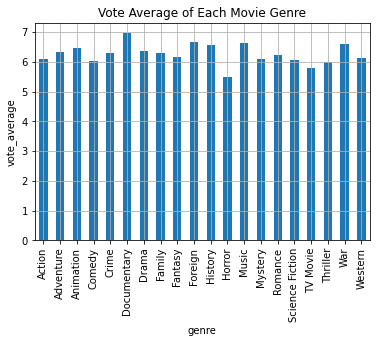

In [108]:
df_vote_average.plot.bar(ylabel="vote_average", title="Vote Average of Each Movie Genre", grid=True)


In conlusion, the genre with highest ***vote_average*** is **Documentary** whereas the lowest ***vote_average*** is **Horror**. 

### Question 5 : Is a certain month of release date associated with higer revunue or higer vote average? 

Firstly I add a new column, ***release_month***, and assign month of release date to the column.   
In order to extract month value from the ***release_date*** column of datetime datatype, I use **pd.DatetimeIndex** function. 

In [92]:
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget(%),release_month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1009.0,6
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,252.0,5
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,268.0,3
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1034.0,12
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,793.0,4


So I got the new column of ***release_month***.   
Now I need to group by the ***vote_average*** and ***revenue*** columns with this ***release_month*** value.

In [93]:
df_monthly_vote = df.groupby(df['release_month']).vote_count.mean()
df_monthly_revenue = df.groupby(df['release_month']).revenue.mean()

In [94]:
df_month = pd.concat([df_monthly_vote, df_monthly_revenue], axis=1)

In [95]:
df_month

,vote_count,revenue
release_month,,
1,371.221477,4.742281e+07
2,441.573770,6.960838e+07
3,727.205298,1.201290e+08
4,628.489051,1.166661e+08
5,871.917722,1.907403e+08
6,959.611465,2.047474e+08
7,861.601307,1.455588e+08
8,431.117647,6.655655e+07
9,368.327586,4.561579e+07


Finally, to see the result visually, I use **plot.line()** method.   
And I want to see the result respectively so I use **subplots=True** to make seperate subplots for each column. 

Text(0, 0.5, 'revenue')

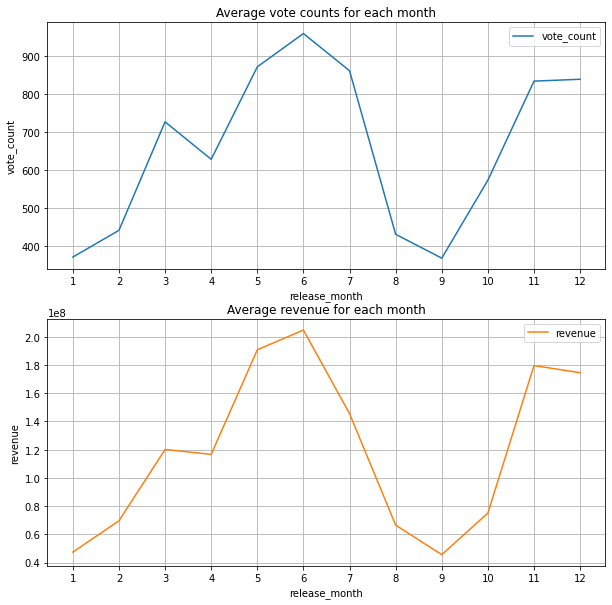

In [107]:
plt = df_month.plot.line(subplots=True, legend=True, title=['Average vote counts for each month', 'Average revenue for each month'], figsize=(10, 10), xticks=range(1,13), sharex=False, grid=True)
plt[0].set_ylabel("vote_count")
plt[1].set_ylabel("revenue")

In conclusion, I could find that the movies which were released during summer or winter time got higher revenue and vote counts. 

<a id='conclusions'></a>
## Conclusions

> **1** Firstly, I was curious about which movies are the top 10 most popular movies. And the results were :    
    - 1st : Jurassic World   
    - 2nd : Mad Max: Fury Road   
    - 3rd : Interstellar   
    - 4th : Guardians of the Galaxy   
    - 5th : Insurgent   
    - 6th : Captain America: The Winter Soldier   
    - 7th : Star Wars   
    - 8th : John Wick   
    - 9th : Star Wars: The Force Awakens   
    - 10th : The Hunger Games: Mockingjay - Part 1   
    

> **2.** In every decades, I found out which movie got the best vote average. The results are shown in below.    
    - 1960s : Dr. No   
    - 1970s : Star Wars   
    - 1980s : Back to the Future   
    - 1990s : Fight Club   
    - 2000s : Avatar   
    - 2010s : Jurassic World   

> **3.** I wonder which movie earned the most revenue compared to the budget. So I divide the revenue into budget and the movie with highst profit rate was *From Prada to Nada* with 2,688,172% of profit rate.

> **4.** I wanted to find out which genre of movie got the highest or lowest vote average. So I used groupby function and the results was *Documentary* genre with the higstes vote average, and *Horror* genre with the lowest vote average. 

>**5.** I wonder if there is any correlation between the month of release date and the success of a movie. So I extracted month value from the **release_date** column and compare the average vote counts and the average revenue by month. The results in two factors were almost similar and it was that a movie which was release in summer or winter got the greater revenue and more vote counts. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate a TMDB 5000 Movie Dataset.ipynb'])